# 1. Importing the dependencies

In [38]:
!pip install mediapipe

In [10]:
import cv2 #for computer vision (reading and writing the image and capturing the image from webcam)
import numpy as np
import os # for working with filepaths 
import matplotlib.pyplot as plt #For plotting 
import time 
import mediapipe as mp #For mapping the keypoints
import tensorflow as tf #For CNN 

# 2. Using MediaPipe Holistics

In [11]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

MediaPipe Detection

In [14]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

Drawing the keypoints

In [16]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

Capturing the video and getting the tensors

In [13]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        # frame = cv2.flip(frame, 1) dont flip 

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [15]:
draw_landmarks(frame, results)

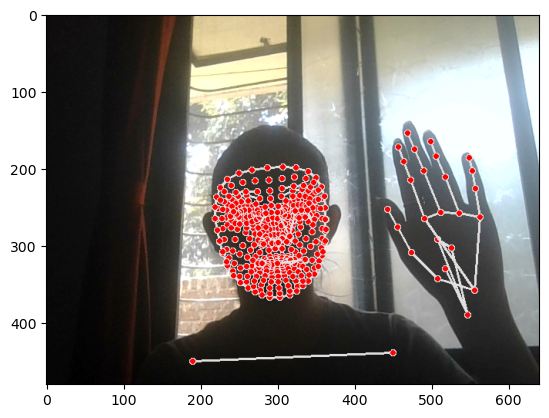

In [17]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) #helps visualise

# 3. Extarcting the keypoints

flatten - flattens the array into a 1-D format for neural network

pose - 132 because the number of landmarks it will have is 132

rh, lh - 21*3 because the len(results.right_hand_landmarks) is 21 and there are 3 (x,y,z) in every 21 landmarks therefore total is (21*3 = 63)

face - 1404 the total number of landmarks in the face

In [1]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3) #This creates an array with zeros if left hand is not in the frame
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    return np.concatenate([pose, face, lh, rh])

In [12]:
extract_keypoints(results).shape

NameError: name 'results' is not defined

In [50]:
result_test = extract_keypoints(results)

In [26]:
#saving the frames as follows
#np.save('name', result_test)
#loading the frames as follows:
#np.load('name.npy')

# 4. Setup Folders for Collection

Now the directory structure created will be as follows:

MP_DATA<br>
    &nbsp;&nbsp;&nbsp;&nbsp;hello<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;..<br>
    &nbsp;&nbsp;&nbsp;&nbsp;iloveyou<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;..<br>
    &nbsp;&nbsp;&nbsp;&nbsp;thanks<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;..<br>

In [18]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('C:\\Users\\mahat\\SignLanguageTranslation\\MP_DATA') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])
# actions = np.array(['hello', 'father', 'me', 'mother', 'yes', 'no', 'help', 'please', 'what', 'cat', 'repeate', 'eat', 'milk', 'more', 'fine', 'thanks', 'you', 'how', 'so-so'])


# Thirty videos worth of data for each image
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [486]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collecting Keypoints for Training and Testing|

In [79]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

        # Looping through actions
        for action in actions:
            # Looping through sequence:
            for sequence in range(no_sequences):
                #Looping throught video length
                for frame_num in range(sequence_length):
                    
                    # Read feed
                    ret, frame = cap.read()
                    # frame = cv2.flip(frame, 1) dont flip 
            
                    # Make detections
                    image, results = mediapipe_detection(frame, holistic)
                    print(results)
                    
                    # Draw landmarks
                    draw_landmarks(image, results)

                    
                    # Apply wait logic
                    if frame_num == 0: 
                        cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA) #line width = 4
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        # Show to screen
                        cv2.imshow('OpenCV Feed', image)
                        cv2.waitKey(500)
                    else: 
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        # Show to screen
                        cv2.imshow('OpenCV Feed', image)

                    #Keypoint extraction
                    keypoints = extract_keypoints(results)
                    npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                    np.save(npy_path, keypoints) #This saves the keypoints array into the file named as frame_num.npy
            
                   

                    # Break gracefully
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break
        cap.release()
        cv2.destroyAllWindows()

NameError: name 'mp_holistic' is not defined

# 6. Preprocessing the Data and Create Labels and Features

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
label_map = {label: num for num, label in enumerate(actions)}
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [24]:
#Structing the data in an array
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [26]:
np.array(sequences).shape

(90, 30, 1662)

In [28]:
np.array(labels).shape

(90,)

In [30]:
X = np.array(sequences)

In [32]:
X.shape

(90, 30, 1662)

In [34]:
y = tf.keras.utils.to_categorical(labels)

In [36]:
y.shape #Basically something like one hot enchoding

(90, 3)

In [38]:
#Spliting the data into training and testing data as follows:
X_train , X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=42)

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train.reshape(-1, 1662)).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, 1662)).reshape(X_test.shape)

# 7. Build and Train CNN Model 

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 1662, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer for 3 classes
])

C:\Users\mahat\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
model.fit(X_train, y_train, validation_data= (X_test, y_test) , epochs=10)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 735ms/step - accuracy: 0.3741 - loss: 1.3293 - val_accuracy: 0.2222 - val_loss: 3.3953
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 633ms/step - accuracy: 0.4306 - loss: 2.2610 - val_accuracy: 0.5556 - val_loss: 1.0861
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 643ms/step - accuracy: 0.6584 - loss: 1.0203 - val_accuracy: 0.7778 - val_loss: 0.9300
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 637ms/step - accuracy: 0.5820 - loss: 0.9844 - val_accuracy: 1.0000 - val_loss: 0.8499
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 617ms/step - accuracy: 0.8819 - loss: 0.8527 - val_accuracy: 0.7778 - val_loss: 0.7525
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 616ms/step - accuracy: 0.7305 - loss: 0.7425 - val_accuracy: 0.7778 - val_loss: 0.6108
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 620ms/step - accuracy: 0.7075 - loss: 0.5941 - val_accuracy: 0.8333 - val_loss: 0.4343
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 617ms/step - accuracy: 0.9249 - loss: 0.4381 - val_accuracy: 0.9444 - val_loss:

# 8. Saving the Model

In [53]:
import joblib 

In [16]:
joblib.dump(model, 'savedModel.txt')

NameError: name 'model' is not defined

# 9. Loading the Model

In [55]:
trained_model = joblib.load('savedModel.txt')

# 10. Summary of the Model

In [18]:
trained_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 28, 1660, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 14, 830, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 12, 828, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 6, 414, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 158976)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 256)                 │      40,698,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,280,779 (466.46 MB)

 Trainable params: 40,760,259 (155.49 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 81,520,520 (310.98 MB)

# 11. Making Predictions

In [39]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


In [49]:
actions[np.argmax(res[4])]

'hello'

In [51]:
actions[np.argmax(y_test[4])]

'hello'

# 12. Evaluating the Confusion Matrix and Accuracy

In [68]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [70]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


In [72]:
ytrue = np.argmax(y_test, axis = 1).tolist() #axis = 1 is row
yhat = np.argmax(yhat, axis = 1).tolist()

In [74]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[10,  0],
        [ 0,  8]],

       [[12,  0],
        [ 0,  6]],

       [[14,  0],
        [ 0,  4]]], dtype=int64)

In [76]:
accuracy_score(ytrue, yhat)

1.0

# 13. Test in Real Time

In [48]:
import cv2
import numpy as np
import mediapipe as mp

sequence = []
sentence = []
threshold = 0.6
collecting = False  # Flag to indicate collection state
frames_collected = 0

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Process frame
        image, results = mediapipe_detection(frame, holistic)
        draw_landmarks(image, results)

        # Display instruction message
        if collecting:
            cv2.putText(image, "Perform the sign", (image.shape[1]//4, image.shape[0]//2), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
            keypoints = extract_keypoints(results)
            sequence.append(keypoints)
            frames_collected += 1
            
            if frames_collected == 30:
                # Display message when collection is over
                cv2.putText(image, "Frame collection complete", (image.shape[1]//4, image.shape[0]//2 + 40), 
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
                
                # Perform prediction
                input_data = np.expand_dims(sequence, axis=0).astype(np.float32)
                # input_data = scaler.transform(input_data.reshape(-1, 1662)).reshape(input_data.shape)
                print("Input data: ", input_data)
                res = model.predict(input_data)[0]
                
                sequence = []  # Reset sequence
                collecting = False  # Stop collection
                frames_collected = 0  # Reset frame counter
                print(res)
                
                # Confidence threshold check
                if float(res[np.argmax(res)]) > threshold:
                    if len(sentence) == 0 or actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                    
                if len(sentence) > 5:
                    sentence = sentence[-5:]  # Keep last 5 recognized words
        
        # Display recognized sentence
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        cv2.imshow('Sign Language Recognition', image)
        
        # Key event handling
        key = cv2.waitKey(10) & 0xFF
        if key == ord('s') and not collecting:  # Start collection when 'S' is pressed
            collecting = True
            sequence = []  # Reset sequence
            frames_collected = 0  # Reset frame counter
            print("Collecting frames...")
        elif key == ord('q'):  # Quit program
            break

    cap.release()
    cv2.destroyAllWindows()


Input data:  [[[ 0.5142199   0.48627698 -0.7178174  ...  0.          0.
    0.        ]
  [ 0.5135138   0.48569474 -0.69721305 ...  0.          0.
    0.        ]
  [ 0.5141328   0.48554772 -0.70369625 ...  0.          0.
    0.        ]
  ...
  [ 0.49953347  0.47962654 -0.6819213  ...  0.162741    0.4892384
   -0.03410964]
  [ 0.49928603  0.4795475  -0.6824254  ...  0.16069992  0.49111062
   -0.03251545]
  [ 0.49833965  0.479595   -0.69198143 ...  0.15935025  0.48750106
   -0.02720013]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[0.6365892  0.02299561 0.3404152 ]
